In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import json

In [2]:
df1 = pd.read_csv("archive/mls-salaries-2017.csv")

In [3]:
def extract_year(x):
    return re.findall(r"\d{4}", x)[0]

def read_all_csv(folder_path):
    import os
    import pandas as pd
    dfs = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            dfs[extract_year(file)] = pd.read_csv(os.path.join(folder_path, file))
    return dfs
    

def join_dfs(dfs):
    merge_on = ["last_name", "first_name"]
    join_note = "---"
    iterator = iter(dfs.items())
    first_name, df = next(iterator)
    df.columns = [col + join_note + first_name if col not in merge_on else col for col in df.columns]


    for new_name, new_df in iterator:
        # merge the dataframes/
        print(new_name)
        new_df.columns = [col + join_note + new_name if col not in merge_on else col for col in new_df.columns]
        df = pd.merge(df, new_df, on=merge_on, how="outer")

    
    # make multicolumn of year
    # df.columns = pd.MultiIndex.from_tuples([tuple(col.split(join_note)) for col in df.columns])
    df.columns = [col.replace(join_note, "_") for col in df.columns]
            
    return df

In [4]:
df1

,club,last_name,first_name,position,base_salary,guaranteed_compensation
0,ATL,Almiron,Miguel,M,1912500.0,2297000.00
1,ATL,Ambrose,Mikey,D,65625.0,65625.00
2,ATL,Asad,Yamil,M,150000.0,150000.00
3,ATL,Bloom,Mark,D,99225.0,106573.89
4,ATL,Carleton,Andrew,F,65000.0,77400.00
...,...,...,...,...,...,...
611,VAN,Tornaghi,Paolo,GK,80000.0,80000.00
612,VAN,Waston,Kendall,D,350000.0,368125.00
613,VAN,Williams,Sheanon,D,175000.0,184000.00
614,NaN,Babouli,Mo,F,54075.0,54075.00


In [5]:
df = read_all_csv("archive")
df = join_dfs(df)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [6]:
df

,club_2007,last_name,first_name,position_2007,base_salary_2007,guaranteed_compensation_2007,club_2008,position_2008,base_salary_2008,guaranteed_compensation_2008,...,base_salary_2015,guaranteed_compensation_2015,club_2016,position_2016,base_salary_2016,guaranteed_compensation_2016,club_2017,position_2017,base_salary_2017,guaranteed_compensation_2017
0,CHI,Armas,Chris,M,225000.0,225000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHI,Banner,Michael,M,12900.0,12900.0,CHI,D,12900.00,12900.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHI,Barrett,Chad,F,41212.5,48712.5,TFC,F,53773.13,61273.13,...,95000.0,100000.0,SJ,F,90000.0,95500.0,RSL,F,99000.00,105000.00
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.0,CHI,M,2492316.00,2666778.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHI,Brown,C.J.,D,106391.0,106391.0,CHI,D,111711.00,111711.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,NaN,Levis,Brett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VAN,D,65000.00,67500.00
2002,NaN,Nerwinski,Jake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VAN,D,65004.00,65004.00
2003,NaN,Reyna,Yordy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VAN,M-F,440000.04,533700.04
2004,NaN,Richey,Spencer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VAN,GK,65004.00,65004.00


In [36]:
added = df[(~df["guaranteed_compensation_2017"].isna())
    & (~df["guaranteed_compensation_2016"].isna()) 
    # & (df["guaranteed_compensation_2016"] < df["guaranteed_compensation_2017"])
    ] 

addition = added["guaranteed_compensation_2017"] - added["guaranteed_compensation_2016"] 
percentage_addition = addition / added["guaranteed_compensation_2016"]

In [40]:
added.iloc[added["guaranteed_compensation_2017"].argmax()]

club_2007                              NaN
last_name                             Kaka
first_name                             NaN
position_2007                          NaN
base_salary_2007                       NaN
guaranteed_compensation_2007           NaN
club_2008                              NaN
position_2008                          NaN
base_salary_2008                       NaN
guaranteed_compensation_2008           NaN
club_2009                              NaN
position_2009                          NaN
base_salary_2009                       NaN
guaranteed_compensation_2009           NaN
club_2010                              NaN
position_2010                          NaN
base_salary_2010                       NaN
guaranteed_compensation_2010           NaN
club_2011                              NaN
position_2011                          NaN
base_salary_2011                       NaN
guaranteed_compensation_2011           NaN
club_2012                              NaN
position_20

<AxesSubplot:>

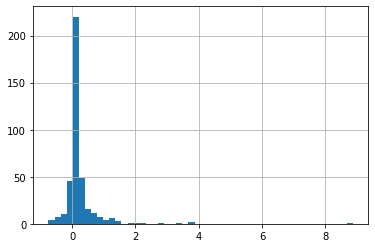

In [27]:
percentage_addition
percentage_addition.hist(bins=50)



<AxesSubplot:>

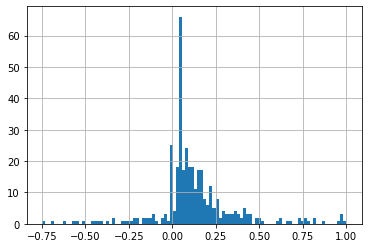

In [28]:
percentage_addition.where(percentage_addition < 1).hist(bins=100)

In [29]:
(percentage_addition.abs() < 0.1).sum()

171

In [30]:
percentage_addition.shape

(390,)

In [31]:
(percentage_addition > 0.1).sum()

186

In [32]:
(percentage_addition < -0.1).sum()

30

In [33]:
import soccerdata

[02/26/23 19:14:14] INFO     No custom team name replacements found. You can configure these in       ]8;id=266481;file:///home/john/.local/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=41140;file:///home/john/.local/lib/python3.8/site-packages/soccerdata/_config.py#85\85]8;;\
                             /home/john/soccerdata/config/teamname_replacements.json.                              

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=841100;file:///home/john/.local/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=982425;file:///home/john/.local/lib/python3.8/site-packages/soccerdata/_config.py#159\159]8;;\
                             /home/john/soccerdata/config/league_dict.json.                                        

In [45]:
read = soccerdata.FiveThirtyEight("Major League Soccer")

ValueError: 
                        Invalid league 'Major League Soccer'. Valid leagues are:
                        ['ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'ITA-Serie A']
                        

In [44]:
df[(df["first_name"] == "David") 
    & (df["last_name"] == "Villa")]

,club_2007,last_name,first_name,position_2007,base_salary_2007,guaranteed_compensation_2007,club_2008,position_2008,base_salary_2008,guaranteed_compensation_2008,...,base_salary_2015,guaranteed_compensation_2015,club_2016,position_2016,base_salary_2016,guaranteed_compensation_2016,club_2017,position_2017,base_salary_2017,guaranteed_compensation_2017
1506,NaN,Villa,David,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5610000.0,5610000.0,NYCFC,F,5610000.0,5610000.0,NYCFC,F,5610000.0,5610000.0


In [13]:
# load from data_2016.json
data_2017 = pd.read_json("archive/data_2017.json")
data_2017.columns

Index(['height', 'weight', 'age', 'isManOfTheMatch', 'isActive',
       'playedPositions', 'playedPositionsShort', 'teamRegionName',
       'regionCode', 'tournamentShortName', 'apps', 'subOn', 'manOfTheMatch',
       'goal', 'assistTotal', 'shotsPerGame', 'aerialWonPerGame', 'name',
       'firstName', 'lastName', 'playerId', 'positionText', 'teamId',
       'teamName', 'seasonId', 'seasonName', 'isOpta', 'tournamentId',
       'tournamentRegionId', 'tournamentRegionCode', 'tournamentRegionName',
       'tournamentName', 'rating', 'minsPlayed', 'yellowCard', 'redCard',
       'passSuccess', 'ranking'],
      dtype='object')

In [17]:
pd.merge(df, 
         data_2017, 
         left_on=["last_name", "first_name"], 
         right_on=["lastName", "firstName"],
         how="outer")

,club_2007,last_name,first_name,position_2007,base_salary_2007,guaranteed_compensation_2007,club_2008,position_2008,base_salary_2008,guaranteed_compensation_2008,...,tournamentRegionId,tournamentRegionCode,tournamentRegionName,tournamentName,rating,minsPlayed,yellowCard,redCard,passSuccess,ranking
0,CHI,Armas,Chris,M,225000.0,225000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHI,Banner,Michael,M,12900.0,12900.0,CHI,D,12900.00,12900.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHI,Barrett,Chad,F,41212.5,48712.5,TFC,F,53773.13,61273.13,...,233.0,us,USA,Major League Soccer,6.043333,65.0,0.0,0.0,61.764706,558.0
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.0,CHI,M,2492316.00,2666778.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHI,Brown,C.J.,D,106391.0,106391.0,CHI,D,111711.00,111711.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.0,us,USA,Major League Soccer,5.950000,1.0,0.0,0.0,100.000000,575.0
2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.0,us,USA,Major League Soccer,5.840000,53.0,0.0,0.0,68.750000,579.0
2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.0,us,USA,Major League Soccer,5.775000,180.0,0.0,0.0,67.187500,585.0
2176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.0,us,USA,Major League Soccer,5.645000,55.0,0.0,1.0,84.444444,587.0
